# SRB moments distributions dataset
Notebook for collection and analysis of identified SRB events.

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

In [2]:
path = '../datasets/preprocessed/'
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfevent.head()

,Frame,Time,MotiveExpTimeSecs,visible,speed,session_id
index,,,,,,
0,0,0.000000,0.0,0,0.0,0
1,0,0.000000,0.0,0,0.0,0
2,1,0.004167,0.0,0,0.0,0
3,2,0.008333,0.0,0,0.0,0
4,3,0.012500,0.0,0,0.0,0


In [3]:
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var
index,,,,,,,,,,,,,
1,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN
2,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN
3,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN
4,24,0.100000,-0.056195,0.072532,-0.049408,-0.629630,-0.767440,0.048207,0,1,-85.621766,173.153665,NaN
5,25,0.104167,-0.056142,0.072577,-0.049344,-0.629153,-0.767353,0.056476,0,1,-84.870594,180.266748,NaN


In [4]:
df0 = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df0.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed
0,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN,0.0,0,0.0
1,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN,0.0,0,0.0
2,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN,0.0,0,0.0
3,24,0.100000,-0.056195,0.072532,-0.049408,-0.629630,-0.767440,0.048207,0,1,-85.621766,173.153665,NaN,0.0,0,0.0
4,25,0.104167,-0.056142,0.072577,-0.049344,-0.629153,-0.767353,0.056476,0,1,-84.870594,180.266748,NaN,0.0,0,0.0


In [5]:
mask = df0.Filtered == 1
df1 = df0[mask]
df1.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed
0,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN,0.0,0,0.0
1,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN,0.0,0,0.0
2,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN,0.0,0,0.0
3,24,0.100000,-0.056195,0.072532,-0.049408,-0.629630,-0.767440,0.048207,0,1,-85.621766,173.153665,NaN,0.0,0,0.0
4,25,0.104167,-0.056142,0.072577,-0.049344,-0.629153,-0.767353,0.056476,0,1,-84.870594,180.266748,NaN,0.0,0,0.0


In [6]:
df = pd.DataFrame()
for name, dd in df1.groupby('session_id'):
    dd['UM'] = dd['U'].rolling(window=5, center=True).mean().values
    df = pd.concat([df, dd], axis=0, ignore_index=True)
    
df.head()

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed,UM
0,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN,0.0,0,0.0,NaN
1,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN,0.0,0,0.0,NaN
2,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN,0.0,0,0.0,167.445860
3,24,0.100000,-0.056195,0.072532,-0.049408,-0.629630,-0.767440,0.048207,0,1,-85.621766,173.153665,NaN,0.0,0,0.0,174.065122
4,25,0.104167,-0.056142,0.072577,-0.049344,-0.629153,-0.767353,0.056476,0,1,-84.870594,180.266748,NaN,0.0,0,0.0,181.448424


## Experiment 2

In [7]:
dfSRB2 = pd.DataFrame()
dd2 = df[df['session_id']==2]

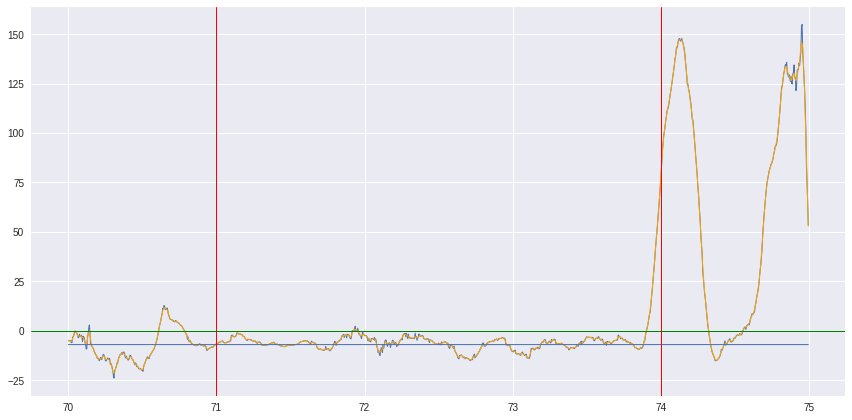

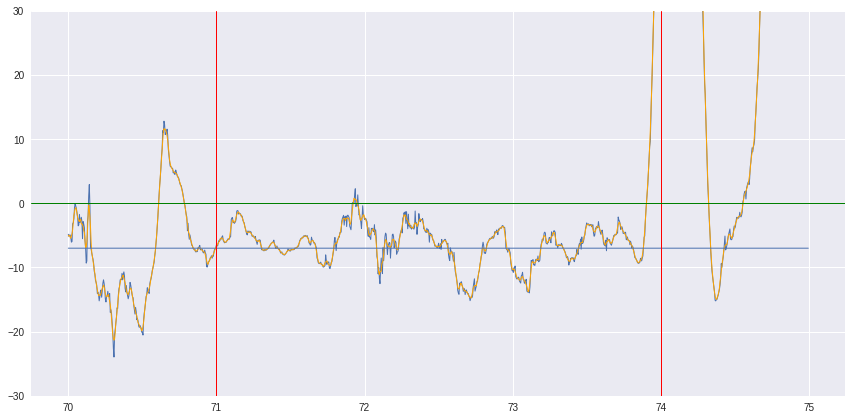

In [8]:
#  71, 73
dpart = dd2[(dd2['Time']>70) & (dd2['Time']<75)]
xmin, xmax = 71, 74

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='orange');

g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='orange');

g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [9]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

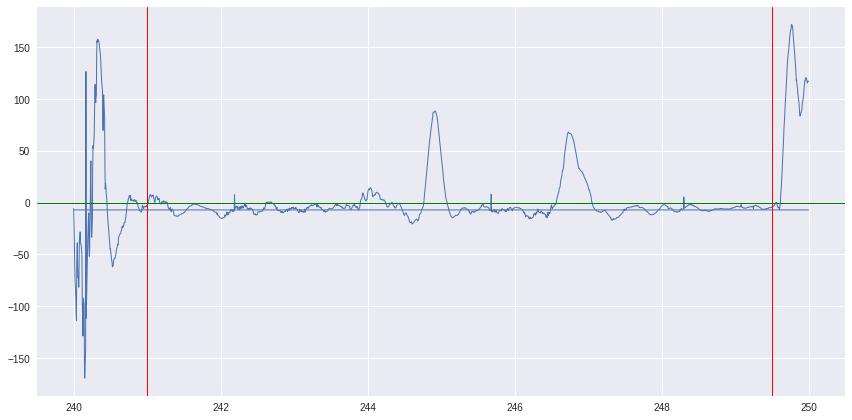

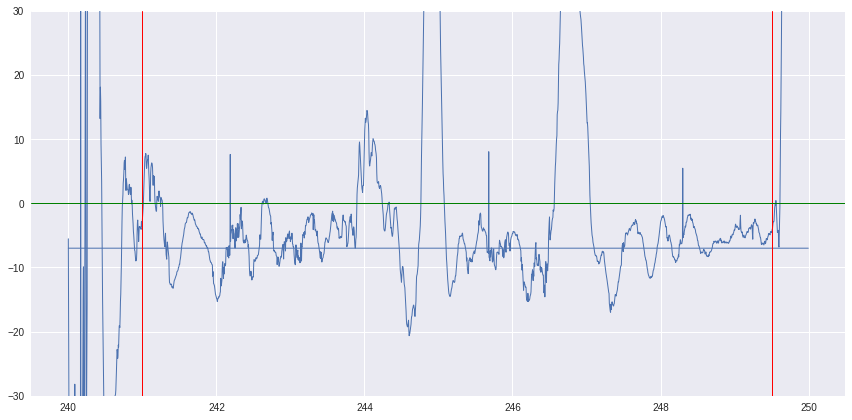

In [10]:

## 247, 249
dpart = dd2[(dd2['Time']>240) & (dd2['Time']<250)]
xmin, xmax = 241, 249.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [11]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

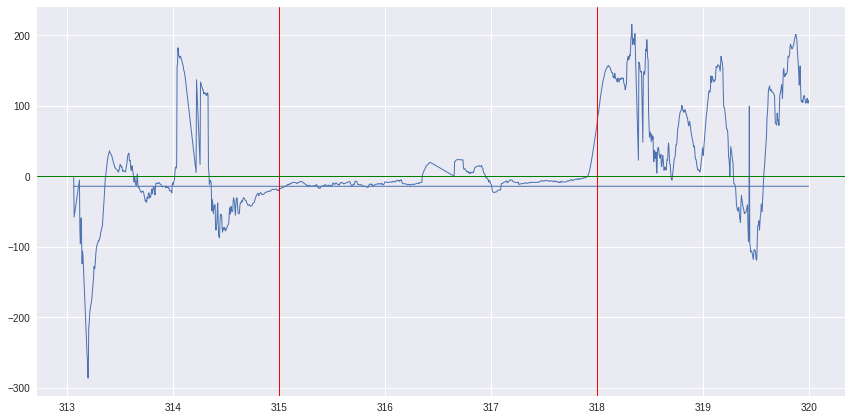

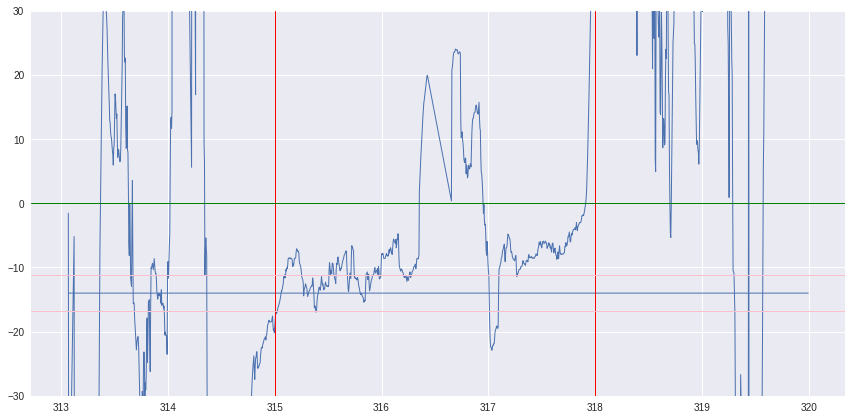

In [12]:
## 315, 317
dpart = dd2[(dd2['Time']>313) & (dd2['Time']<320)]
xmin, xmax = 315, 318

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-11.2, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-16.8, alpha=1, linewidth=1, color='pink');


In [13]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

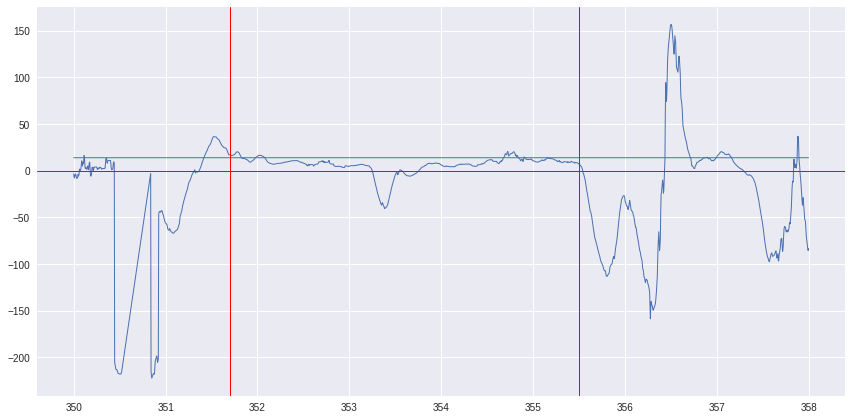

In [14]:
## 351, 356
dpart = dd2[(dd2['Time']>350) & (dd2['Time']<358)]
xmin, xmax = 351.7, 355.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [15]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

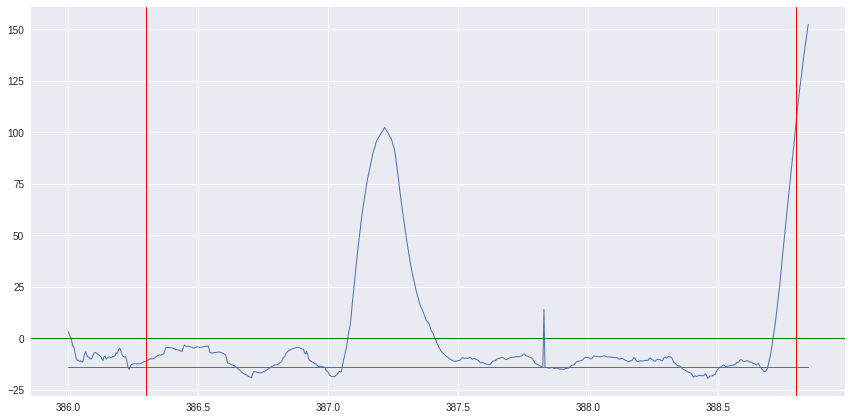

In [16]:
## 386, 388
dpart = dd2[(dd2['Time']>386) & (dd2['Time']<388.85)]
xmin, xmax = 386.3, 388.8

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [17]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

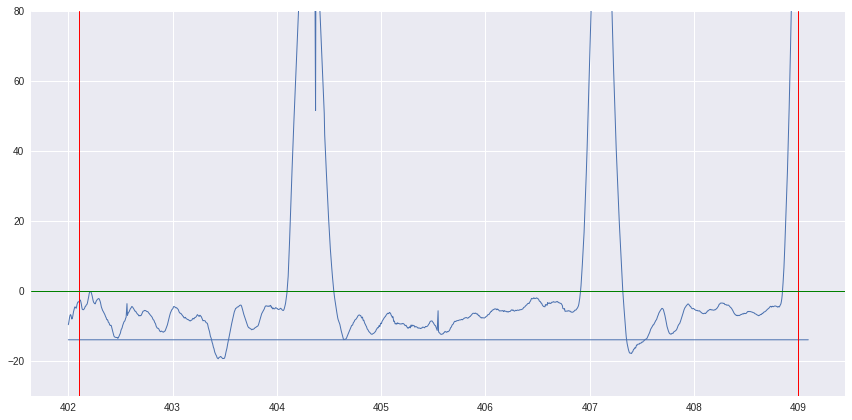

In [18]:
## 402, 407
dpart = dd2[(dd2['Time']>402) & (dd2['Time']<409.1)]
xmin, xmax = 402.1, 409

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,80])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [19]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

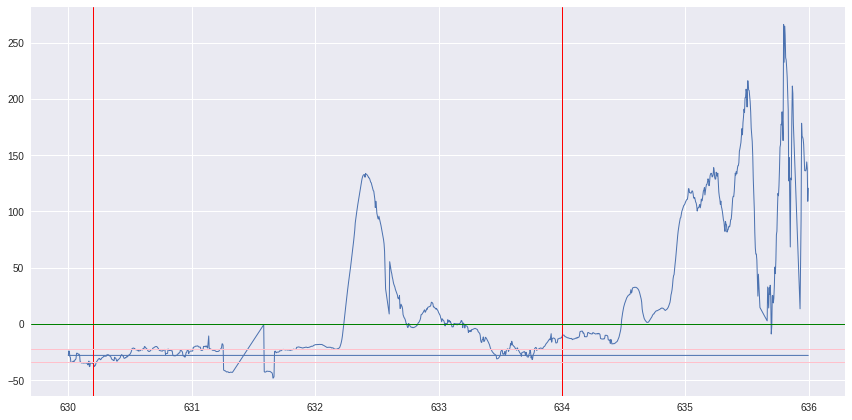

In [20]:
## 630, 632, 633, 634
dpart = dd2[(dd2['Time']>630) & (dd2['Time']<636)]
xmin, xmax = 630.2, 634

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-33.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-22.4, alpha=1, linewidth=1, color='pink');


In [21]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

## Experiment 4

In [22]:
dfSRB4 = pd.DataFrame()
dd4 = df[df['session_id']==4]

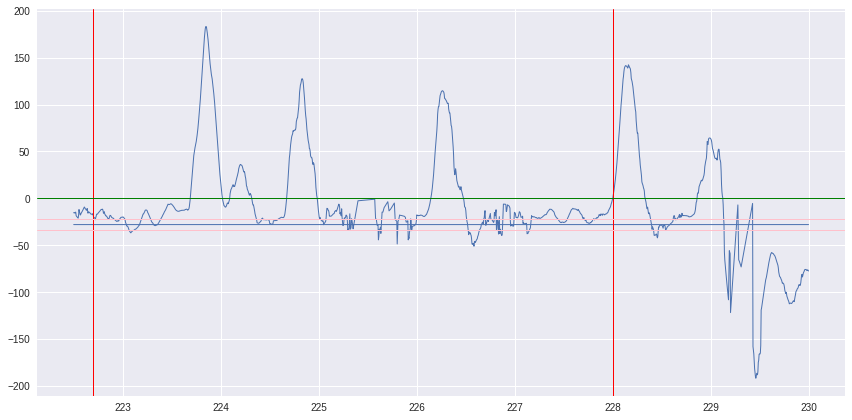

In [23]:
# 221, 228
dpart = dd4[(dd4['Time']>222.5) & (dd4['Time']<230)]
xmin, xmax = 222.7, 228

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-33.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-22.4, alpha=1, linewidth=1, color='pink');


In [24]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

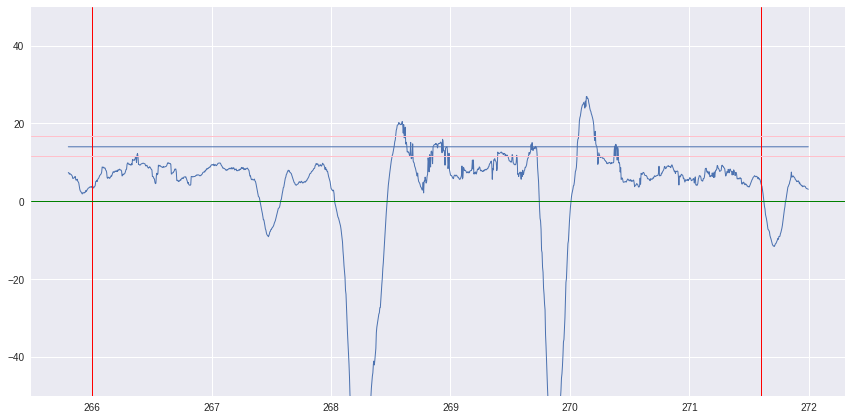

In [25]:
# 267, 270
dpart = dd4[(dd4['Time']>265.8) & (dd4['Time']<272)]
xmin, xmax = 266, 271.6

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-50,50])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);

g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=11.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');


In [26]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

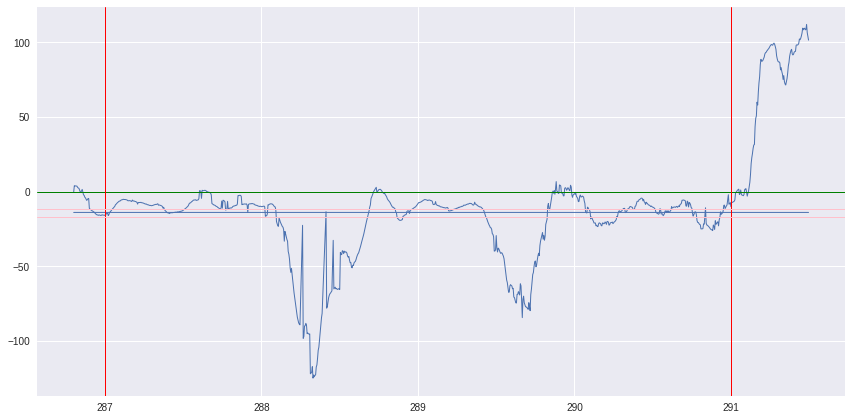

In [27]:
# 287, 291
dpart = dd4[(dd4['Time']>286.8) & (dd4['Time']<291.5)]
xmin, xmax = 287, 291

g = sns.FacetGrid(data=dpart, size=6, aspect=2)
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

g.map(plt.axhline, y=-11.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-16.8, alpha=1, linewidth=1, color='pink');


In [28]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

## Experiment 5

In [29]:
dfSRB5 = pd.DataFrame()
dd5 = df[df['session_id']==5]

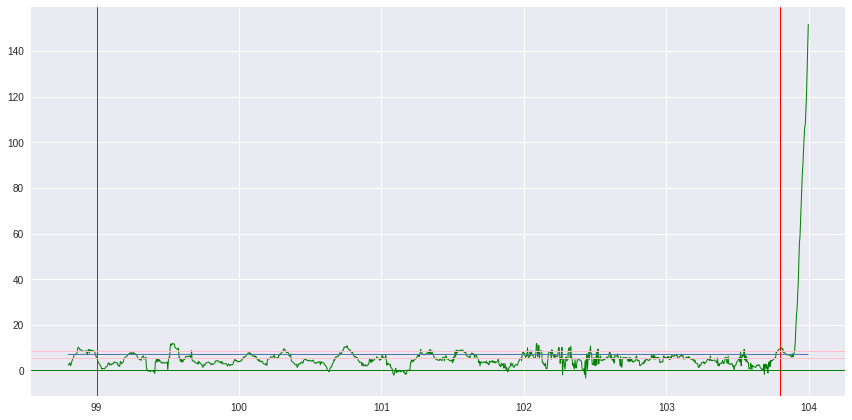

In [30]:
#  99, 104
dpart = dd5[(dd5['Time']>98.8) & (dd5['Time']<104)]
xmin, xmax = 99, 103.8

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=8.4, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=5.6, alpha=1, linewidth=1, color='pink');


In [31]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

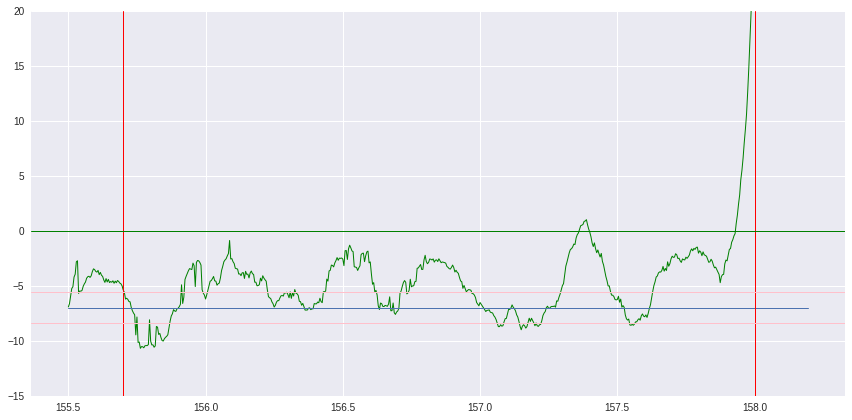

In [32]:
# 155, 157
dpart = dd5[(dd5['Time']>155.5) & (dd5['Time']<158.2)]
xmin, xmax = 155.7, 158

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-15,20])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-8.4, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-5.6, alpha=1, linewidth=1, color='pink');


In [33]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

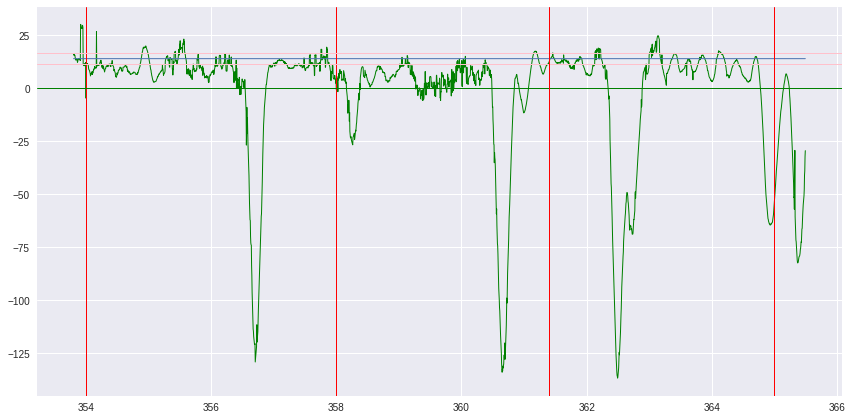

In [34]:
# 355, 365
dpart = dd5[(dd5['Time']>353.8) & (dd5['Time']<365.5)]
xmin, xmax = 354, 358

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=11.6, alpha=1, linewidth=1, color='pink');

dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

xmin, xmax = 361.4, 365
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

## Experiment 6

In [35]:
dfSRB6 = pd.DataFrame()
dd6 = df[df['session_id']==6]

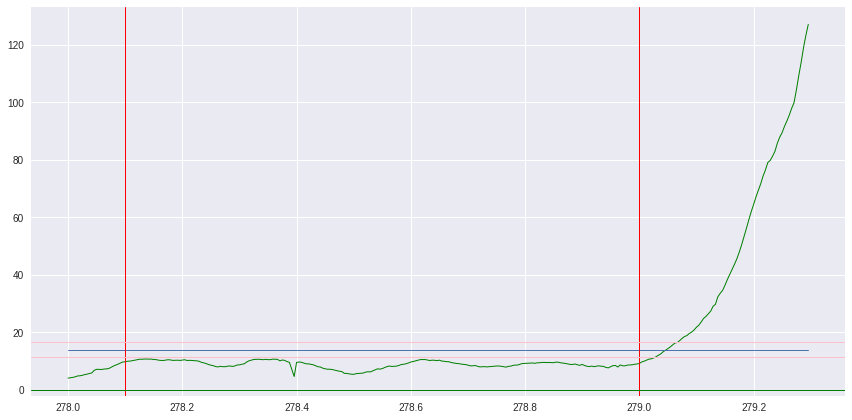

In [36]:
# 278, 279
dpart = dd6[(dd6['Time']>278) & (dd6['Time']<279.3)]
xmin, xmax = 278.1, 279

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=11.6, alpha=1, linewidth=1, color='pink');


In [37]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

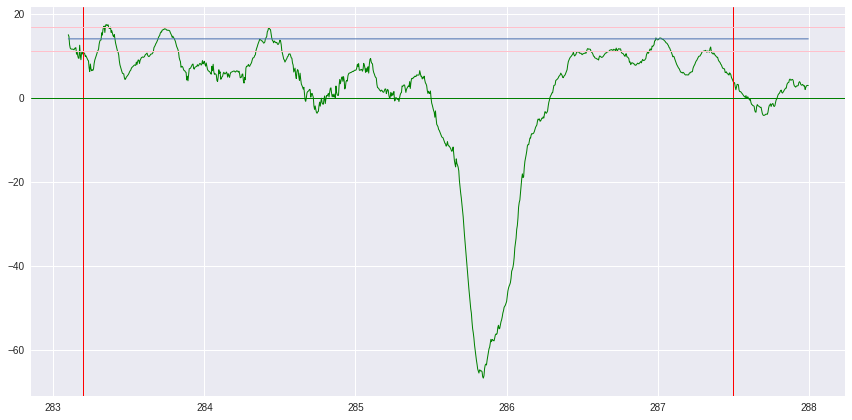

In [38]:
# 281, 283
dpart = dd6[(dd6['Time']>283.1) & (dd6['Time']<288)]
xmin, xmax = 283.2, 287.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=11.2, alpha=1, linewidth=1, color='pink');


In [39]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

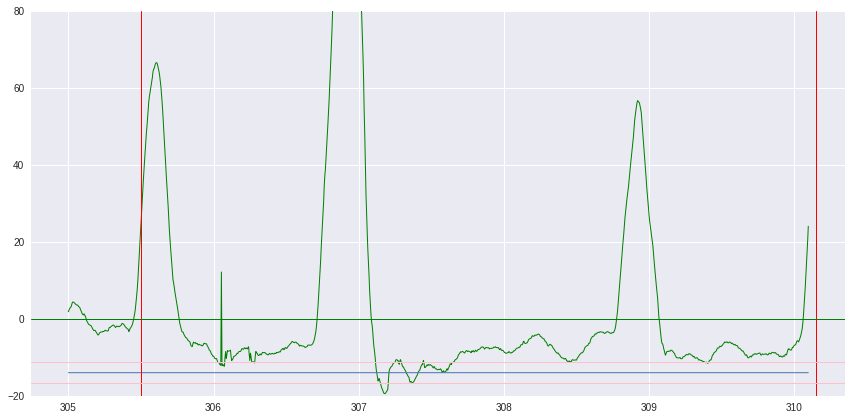

In [40]:
# 305, 310
dpart = dd6[(dd6['Time']>305) & (dd6['Time']<310.1)]
xmin, xmax = 305.5, 310.15

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-20,80])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-11.2, alpha=1, linewidth=1, color='pink');


In [41]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

## Experiment 7

In [42]:
dfSRB7 = pd.DataFrame()
dd7 = df[df['session_id']==7]

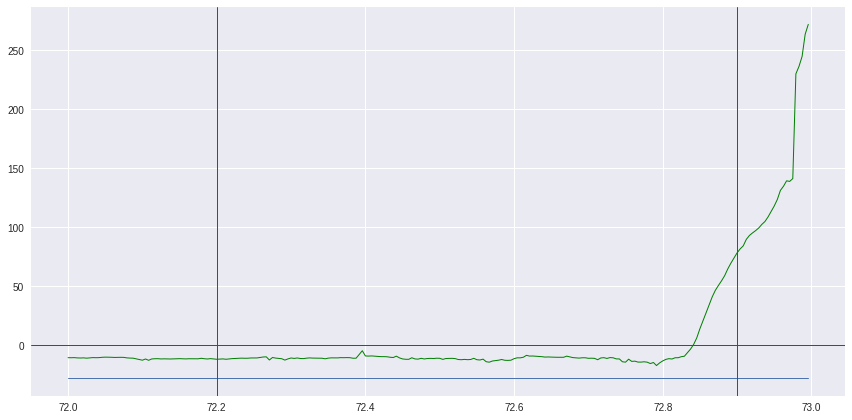

In [43]:
# 71, 73
dpart = dd7[(dd7['Time']>72) & (dd7['Time']<73)]
xmin, xmax = 72.2, 72.9

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [44]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

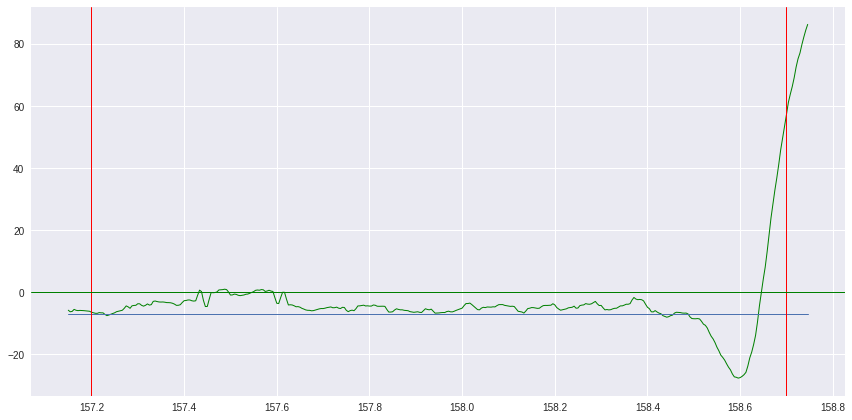

In [45]:
# 157, 159
dpart = dd7[(dd7['Time']>157.15) & (dd7['Time']<158.75)]
xmin, xmax = 157.2, 158.7

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [46]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

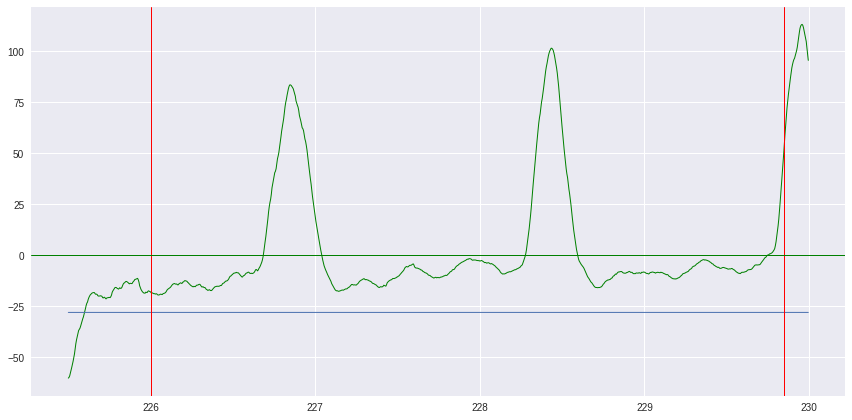

In [47]:
# 225, 230
dpart = dd7[(dd7['Time']>225.5) & (dd7['Time']<230)]
xmin, xmax = 226, 229.85

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [48]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

## Experiments combined - visualization

In [49]:
dfSRB = pd.DataFrame()
dfSRB = pd.concat([dfSRB, dfSRB2], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB4], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB5], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB6], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB7], axis=0, ignore_index=True)

In [50]:
dfSRB.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed,UM
0,17040,71.000005,0.072527,0.095381,-0.038309,0.943099,-0.269909,-0.193486,2,1,101.593927,-6.476111,3.547109,59.129167,1,-7.0,-6.754520
1,17041,71.004171,0.072574,0.095399,-0.038302,0.943414,-0.269083,-0.193078,2,1,101.566350,-6.619523,3.361068,59.129167,1,-7.0,-6.551470
2,17042,71.008338,0.072619,0.095418,-0.038296,0.943710,-0.268324,-0.192663,2,1,101.538637,-6.650517,3.164100,59.129167,1,-7.0,-6.336417
3,17043,71.012505,0.072651,0.095434,-0.038296,0.943921,-0.267874,-0.192269,2,1,101.513152,-6.116049,2.949904,59.129167,1,-7.0,-6.226722
4,17044,71.016671,0.072682,0.095448,-0.038298,0.944126,-0.267428,-0.191894,2,1,101.488906,-5.819882,2.738149,59.129167,1,-7.0,-6.011276


In [51]:
len(dfSRB) * 100/ len(dfratv)

1.197853069650927

In [52]:
l, lsrb = {}, {}
for i, dd in dfratv.groupby('session_id'):
    l[i] = len(dd) 
    
for i, dd in dfSRB.groupby('session_id'):
    print(i, len(dd) * 100/l[i])

2 4.261611113658246
4 2.3575584774329417
6 1.6363812636769064
7 1.436028488249686


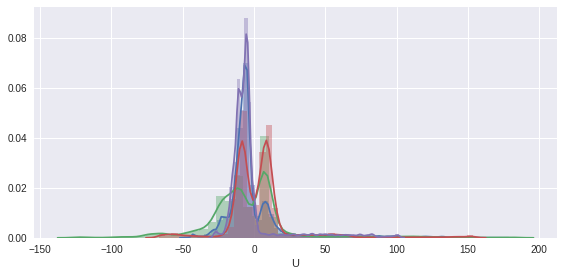

In [53]:
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'U');

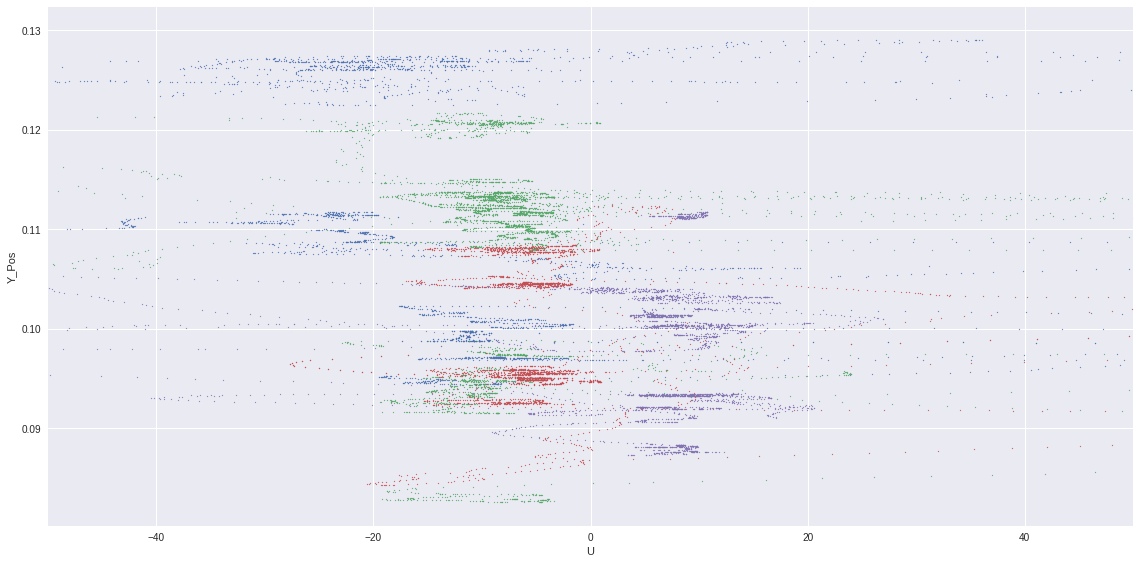

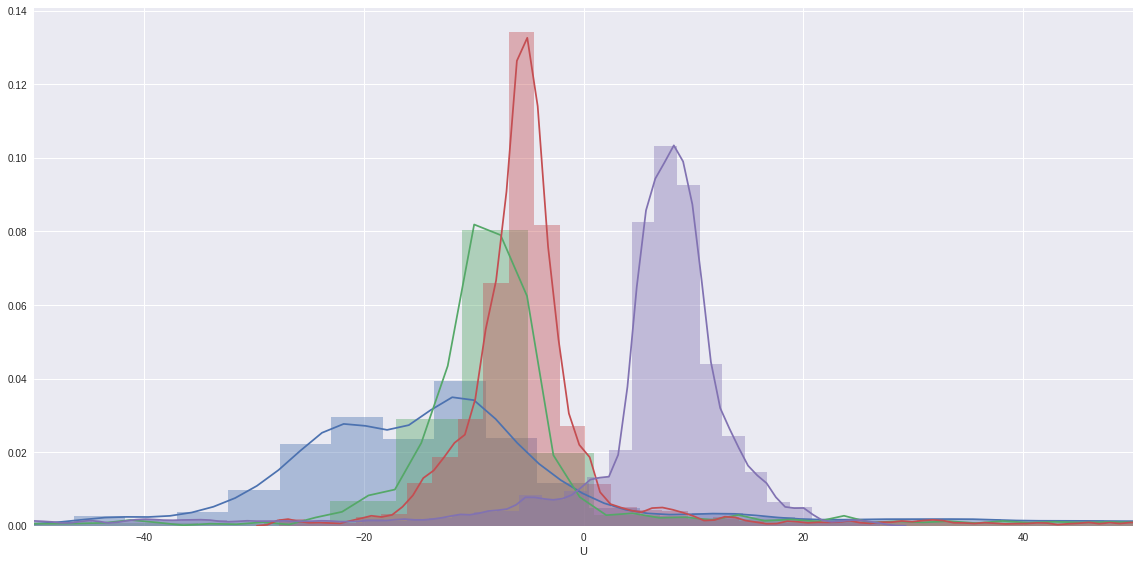

In [54]:
g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(plt.scatter,'U', "Y_Pos", alpha=0.8, s=1);

g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(sns.distplot, 'U');


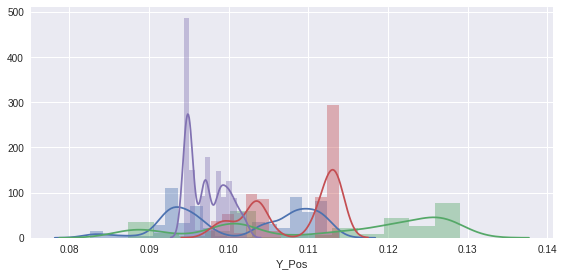

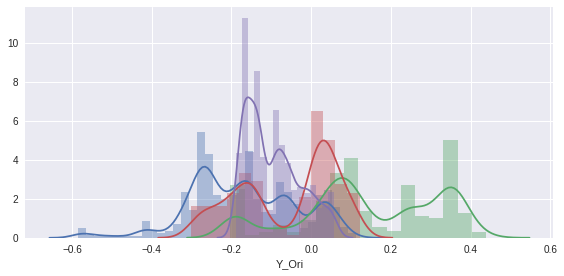

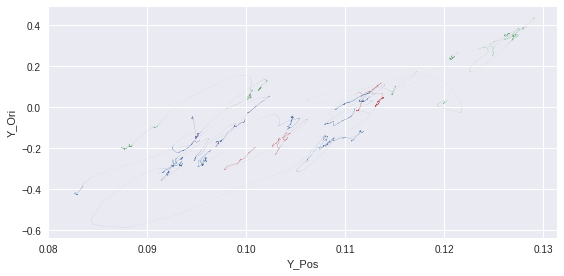

In [55]:
# postiion distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

# oritentation distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

# scatter between orientation and position
g = sns.FacetGrid( data=dfSRB, size=4, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

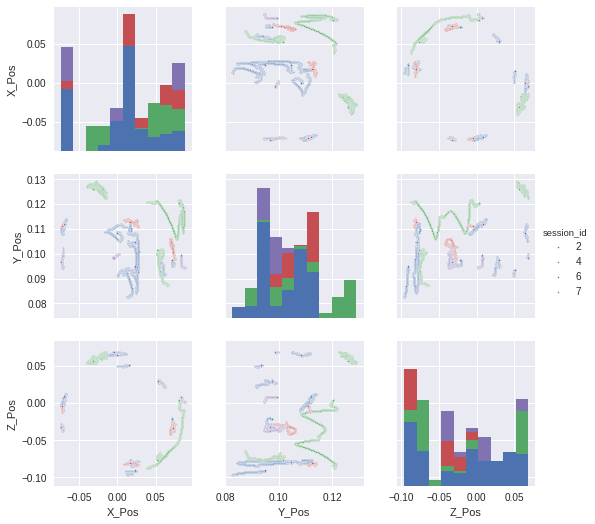

In [56]:
sns.pairplot(dfSRB, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], plot_kws={"s": 3}, hue='session_id');

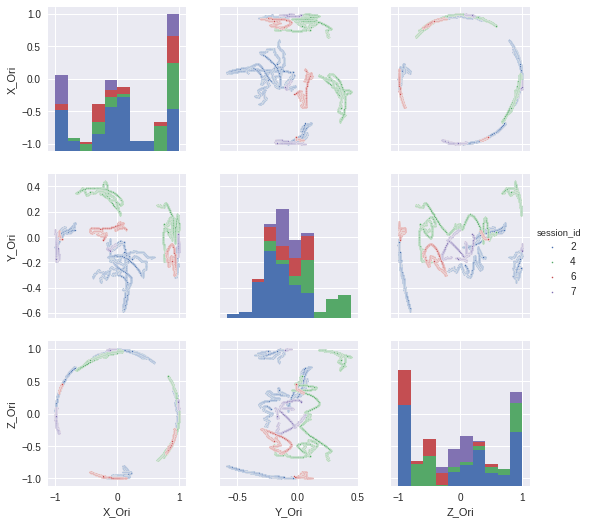

In [57]:
sns.pairplot(dfSRB, vars=['X_Ori', 'Y_Ori', 'Z_Ori'], plot_kws={"s": 3}, hue='session_id');

In [58]:
import datashader as ds
from matplotlib import rcParams, cm


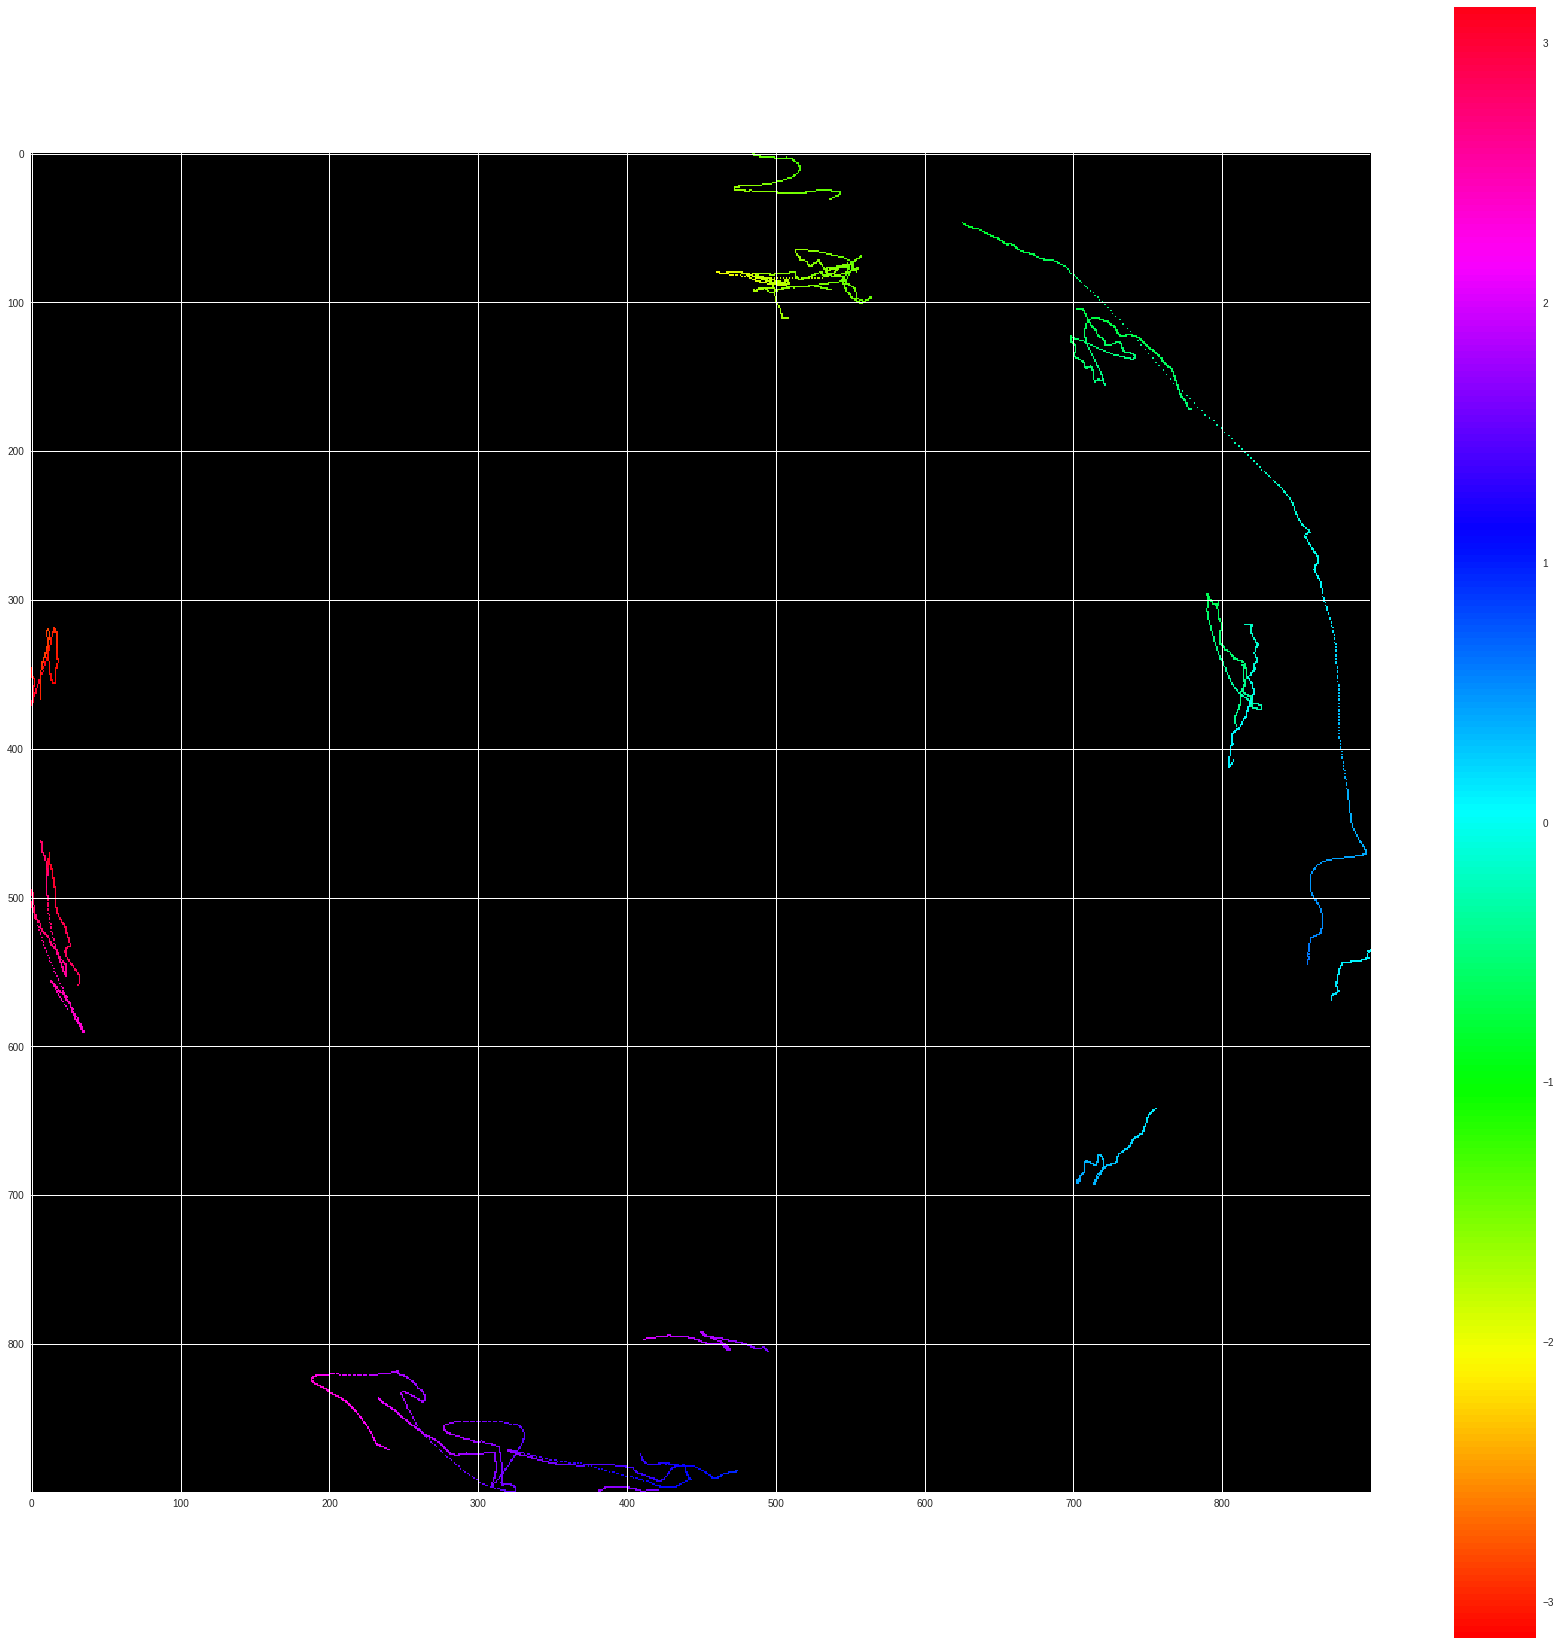

In [59]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfSRB, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfSRB, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(30, 30))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar()


In [60]:
dfSRB.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed,UM
0,17040,71.000005,0.072527,0.095381,-0.038309,0.943099,-0.269909,-0.193486,2,1,101.593927,-6.476111,3.547109,59.129167,1,-7.0,-6.754520
1,17041,71.004171,0.072574,0.095399,-0.038302,0.943414,-0.269083,-0.193078,2,1,101.566350,-6.619523,3.361068,59.129167,1,-7.0,-6.551470
2,17042,71.008338,0.072619,0.095418,-0.038296,0.943710,-0.268324,-0.192663,2,1,101.538637,-6.650517,3.164100,59.129167,1,-7.0,-6.336417
3,17043,71.012505,0.072651,0.095434,-0.038296,0.943921,-0.267874,-0.192269,2,1,101.513152,-6.116049,2.949904,59.129167,1,-7.0,-6.226722
4,17044,71.016671,0.072682,0.095448,-0.038298,0.944126,-0.267428,-0.191894,2,1,101.488906,-5.819882,2.738149,59.129167,1,-7.0,-6.011276
